In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
tesla=pd.read_csv("TSLA.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [26]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [27]:
tesla["Date"]=pd.to_datetime(tesla["Date"])

In [28]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2956 non-null   datetime64[ns]
 1   Open       2956 non-null   float64       
 2   High       2956 non-null   float64       
 3   Low        2956 non-null   float64       
 4   Close      2956 non-null   float64       
 5   Adj Close  2956 non-null   float64       
 6   Volume     2956 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 161.8 KB


In [29]:
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
tesla.sort_values(by=["Date"],ascending=True,inplace=True)

In [31]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [32]:
from pylab import rcParams
from scipy.fftpack import fftfreq
import statsmodels.api as sm

In [33]:
tesla1=tesla[["Date","Adj Close"]]

In [34]:
tesla1.set_index("Date",inplace=True)

In [35]:
tesla1.head(2)

,Adj Close
Date,
2010-06-29,4.778
2010-06-30,4.766


# MULTIPLICATIVE MODEL

In [36]:
dec=sm.tsa.seasonal_decompose(tesla1["Adj Close"],model="multiplicative",period=1)

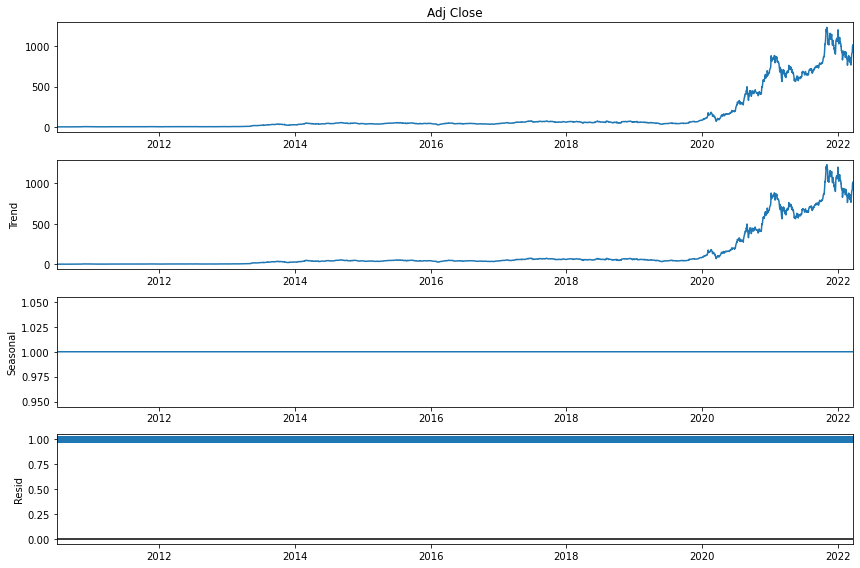

In [37]:
rcParams["figure.figsize"]=12,8
fig=dec.plot()
plt.show()

# ADDITIVE MODEL

In [38]:
dec=sm.tsa.seasonal_decompose(tesla1["Adj Close"],model="additive",period=1)

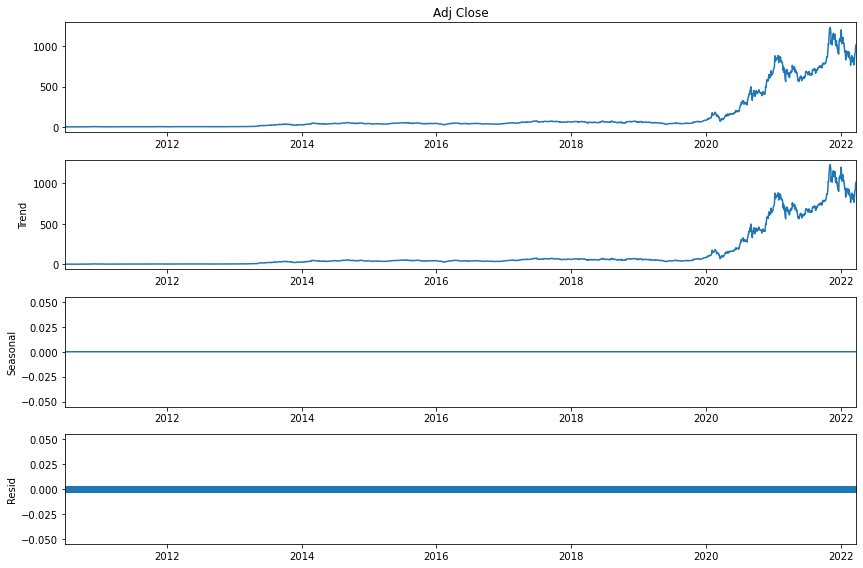

In [39]:
rcParams["figure.figsize"]=12,8
fig=dec.plot()
plt.show()

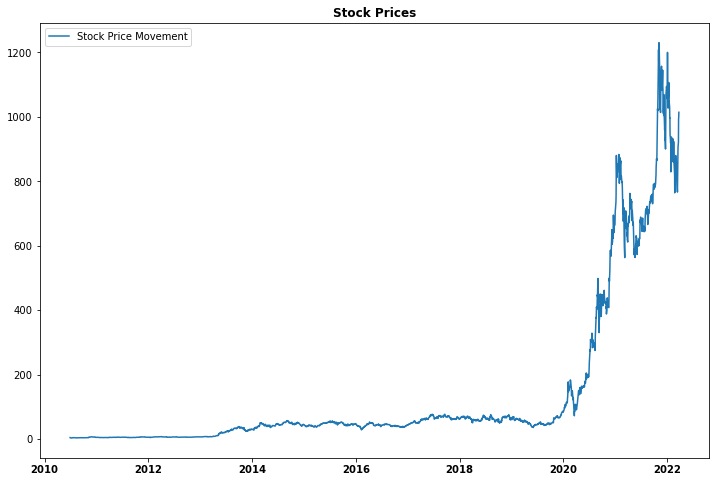

In [40]:
plt.plot(tesla1,label="Stock Price Movement")
plt.legend(loc="best")
plt.title("Stock Prices",fontweight="demibold")
plt.xticks(rotation=0,fontweight='heavy')
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(tesla1["Adj Close"])
s=adf_test[1]
print("p-value : {}".format(s))

p-value : 0.9972202364261444


In [42]:
from scipy.stats import boxcox
data_bc=pd.Series(boxcox(tesla1['Adj Close'],lmbda=0),index=tesla1.index)

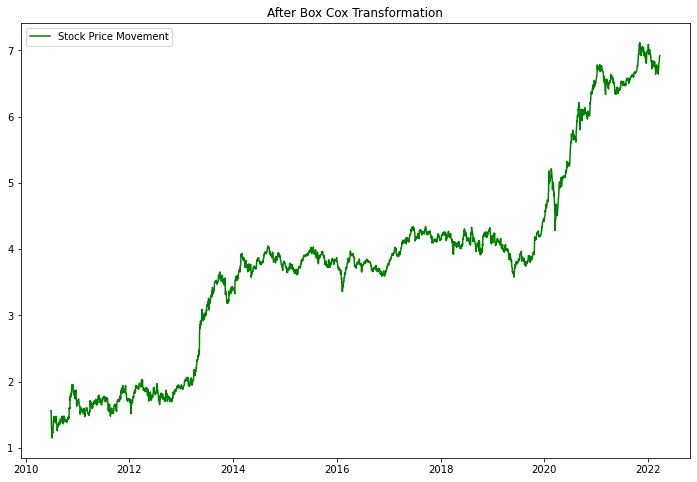

In [43]:
plt.title("After Box Cox Transformation")
plt.plot(data_bc,label="Stock Price Movement",color='g')
plt.legend(loc='best')
plt.show()

In [44]:
data_diff=pd.Series(data_bc-data_bc.shift(),tesla1.index)

In [45]:
data_diff.head()

Date
2010-06-29         NaN
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
dtype: float64

In [46]:
data_diff.dropna(how="any",axis=0,inplace=True)
data_diff.head()

Date
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
2010-07-07   -0.019430
dtype: float64

In [47]:
adf_test=adfuller(data_diff)
print("p-value : {}".format(adf_test[1]))

p-value : 0.0


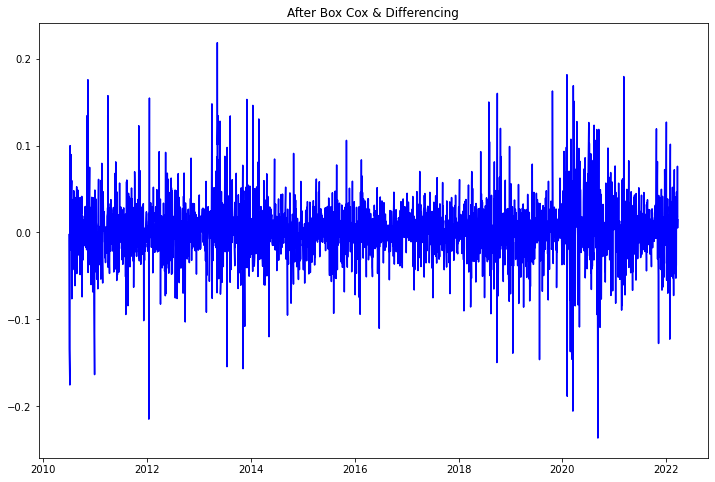

In [48]:
plt.title("After Box Cox & Differencing")
plt.plot(data_diff,color='b')
plt.show()

<Figure size 1000x800 with 0 Axes>

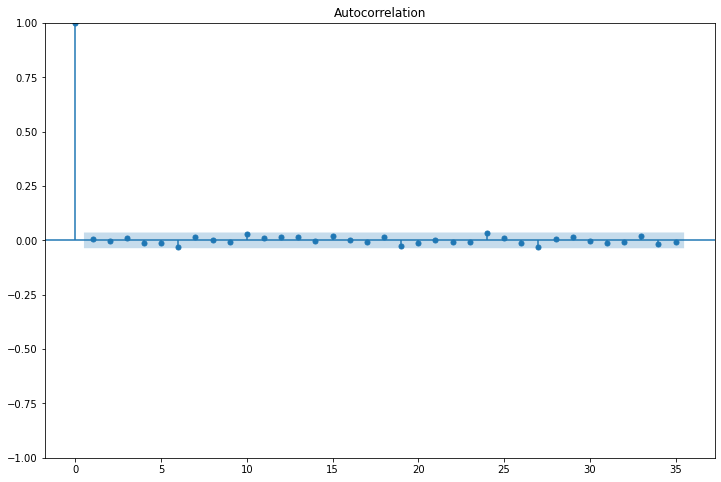

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,8),dpi=100)
plot_acf(data_diff)
plt.show()

In [65]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 1000x800 with 0 Axes>

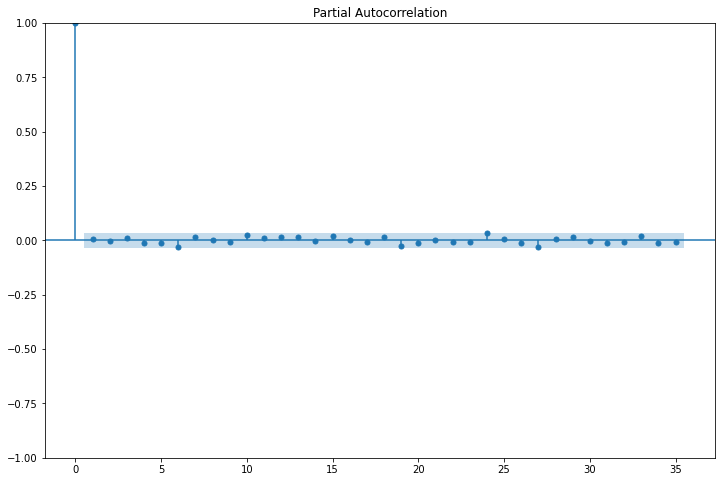

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,8),dpi=100)
plot_pacf(data_diff)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(tesla1,test_size=0.2,shuffle=False)

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data_diff,order=(0,1,0))
model_fit=model.fit()

In [69]:
y_hat_ar=data_diff.copy()

In [70]:
y_hat_ar["ar_bc"]=model_fit.predict(data_diff.index.min(),data_diff.index.max())
y_hat_ar["ar_bc"]=y_hat_ar["ar_bc"].cumsum()
y_hat_ar["ar_bc"]=y_hat_ar["ar_bc"].add(data_bc[0])
y_hat_ar["ar_bc_forecast"]=np.exp(y_hat_ar["ar_bc"])

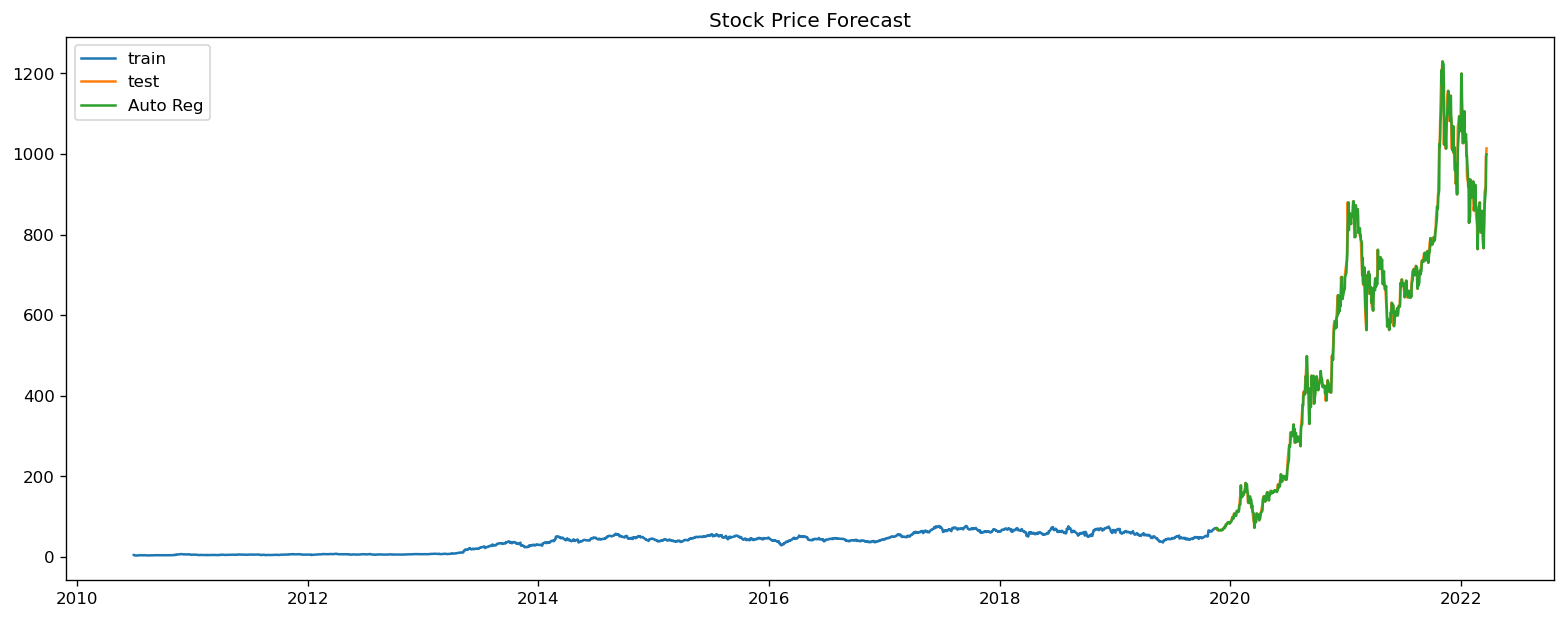

In [71]:
plt.figure(figsize=(16,6),dpi=120)
plt.plot(train["Adj Close"],label="train")
plt.plot(test["Adj Close"],label="test")
plt.plot(y_hat_ar["ar_bc_forecast"][test.index.min():],label="Auto Reg")
plt.legend(loc='best')
plt.title("Stock Price Forecast")
plt.show()

In [56]:
import sklearn.metrics as skm

In [72]:
skm.mean_absolute_percentage_error(test["Adj Close"],y_hat_ar["ar_bc_forecast"][test.index.min():])

0.0320040407892051

In [73]:
np.round(np.mean(np.abs(test["Adj Close"]-y_hat_ar["ar_bc_forecast"][test.index.min():])/test["Adj Close"])*100,2)

3.2

# Predicting next 30 days Stock Price

In [74]:
fp=model_fit.predict(start=len(tesla1),end=len(tesla1)+30)
fp=fp.cumsum()
fp=fp.add(data_bc[0])
fp=np.exp(fp)

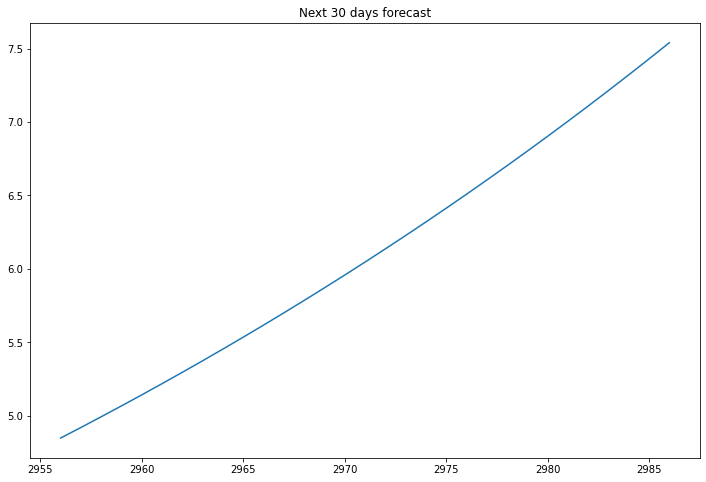

In [75]:
plt.plot(fp)
plt.title("Next 30 days forecast")
plt.show()